In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading matches DataSet
match_DF = pd.read_csv('matches.csv')
match_DF.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
# Reading deliveries DataSets
deliveries_DF = pd.read_csv('deliveries.csv')
deliveries_DF.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
# Getting Info of match_DF
match_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [5]:
# Getting Info of deliveries_DF
deliveries_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [6]:
match_DF.drop('umpire3',axis=1,inplace=True)

In [7]:
match_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
dtypes: int64(5), object(12)
memory usage: 84.5+ KB


In [8]:
match_DF.umpire1.fillna(method='ffill',inplace=True)
match_DF.umpire2.fillna(method='ffill',inplace=True)

In [9]:
# Purple Cap Holder of Seasons
match1 = match_DF[['id','season']]
del1 = deliveries_DF[['match_id','bowler','dismissal_kind']]
df1 = pd.merge(del1,match1,left_on='match_id',right_on='id')
df1.head()

,match_id,bowler,dismissal_kind,id,season
0,1,TS Mills,NaN,1,2017
1,1,TS Mills,NaN,1,2017
2,1,TS Mills,NaN,1,2017
3,1,TS Mills,NaN,1,2017
4,1,TS Mills,NaN,1,2017


In [10]:
df1[df1['dismissal_kind']!='run out'].groupby(['season','bowler'])['dismissal_kind'].agg('count').reset_index().sort_values('dismissal_kind',ascending=False).drop_duplicates('season',keep='first').sort_values('season',ascending=False).set_index('season')

,bowler,dismissal_kind
season,,
2017,B Kumar,26
2016,B Kumar,23
2015,DJ Bravo,26
2014,MM Sharma,23
2013,DJ Bravo,32
2012,M Morkel,25
2011,SL Malinga,28
2010,PP Ojha,21
2009,RP Singh,23


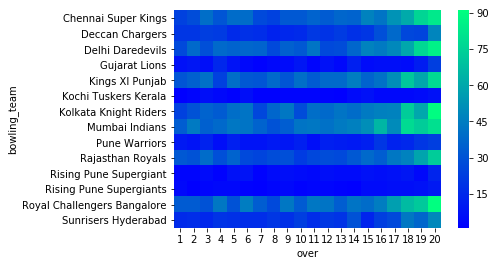

In [11]:
# heatmap among bowling_team vs player_dismissed per_over
x = deliveries_DF[['bowling_team','over','player_dismissed']]
x = pd.pivot_table(values='player_dismissed',index='bowling_team',data=x,columns='over',aggfunc='count')
sns.heatmap(x,cmap='winter')

In [12]:
# Best batsman in death overs(17-20)
x = deliveries_DF[deliveries_DF['over']>16][['match_id','ball','batsman','batsman_runs']].groupby('batsman')['batsman_runs'].sum().reset_index()
y = deliveries_DF[deliveries_DF['over']>16][['match_id','ball','batsman','batsman_runs']].groupby('batsman')['ball'].count().reset_index()
y = y[y.ball>49]
y = y.merge(x,on='batsman').set_index('batsman')
y['strike_rate'] = round(y.batsman_runs*100.0/y.ball,2)
y.sort_values('strike_rate',ascending=False).head(1)

,ball,batsman_runs,strike_rate
batsman,,,
AB de Villiers,409,905,221.27


In [13]:
deliveries_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

df1 = match_DF[['id','umpire1']]
df2 = match_DF[['id','umpire2']]
df2['umpire1'] = df2['umpire2']
df2.drop('umpire2',axis=1,inplace=True)
pd.merge(pd.concat([df1,df2]),deliveries_DF,left_on='id',right_on='match_id').drop_duplicates('match_id',keep='first').groupby(['umpire1'])['match_id'].count().reset_index().sort_values('match_id',ascending=False).set_index('umpire1')

In [14]:
def get_bowler(x):
    x = x.lower()
    y = deliveries_DF.groupby(['batsman','bowler']).player_dismissed.count().reset_index().sort_values('player_dismissed',ascending=False)
    y = y[y.batsman.apply(lambda i:i.lower())==x]
    return y[y.player_dismissed==y.player_dismissed.max()]
get_bowler('v kohli')

,batsman,bowler,player_dismissed
15914,V Kohli,A Nehra,6


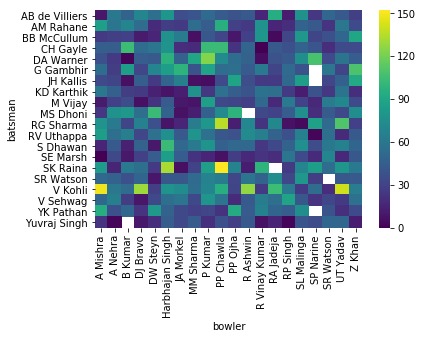

In [15]:
bat = deliveries_DF.groupby('batsman').batsman_runs.sum().reset_index().sort_values('batsman_runs',ascending=False).head(20)
bowl = deliveries_DF[deliveries_DF.dismissal_kind!='run out'].groupby('bowler').dismissal_kind.count().reset_index().sort_values('dismissal_kind',ascending=False).head(20)
# x = deliveries_DF.set_index('bowler').loc[bowl['bowler']].reset_index().set_index('batsman').loc[bat['batsman']].pivot_table(values='batsman_runs',index='batsman',columns='bowler',aggfunc='sum')
# sns.heatmap(x,cmap='winter')
x = deliveries_DF.set_index('bowler').loc[bowl['bowler']].reset_index()
x = x.set_index('batsman').loc[bat['batsman']].reset_index()
x = x.pivot_table(values='batsman_runs',index='batsman',columns='bowler',aggfunc='sum')
sns.heatmap(x,cmap='viridis')


In [16]:
delivery = deliveries_DF[deliveries_DF.over>16][['match_id','bowler','ball','total_runs']]
x = delivery.groupby('bowler').total_runs.sum().reset_index()
y = delivery.groupby('bowler').ball.count().reset_index()
y['overs'] = round(y.ball/6.0,2)
y = y.drop('ball',axis=1)
y = y[y.overs>=10]
y = y.merge(x,on='bowler').set_index('bowler')
y['economy'] = round(y.total_runs/y.overs,2)
y.sort_values('economy',ascending=True).head()

,overs,total_runs,economy
bowler,,,
Sohail Tanvir,16.33,110,6.74
DE Bollinger,36.00,268,7.44
SP Narine,84.83,631,7.44
SL Malinga,148.50,1124,7.57
BA Stokes,10.83,84,7.76


In [17]:
x = deliveries_DF[deliveries_DF.dismissal_kind == 'caught']
x.groupby('fielder').dismissal_kind.count().reset_index().sort_values('dismissal_kind',ascending=False).head(10).fielder

187        KD Karthik
358          SK Raina
16     AB de Villiers
248          MS Dhoni
330        RV Uthappa
313         RG Sharma
266           NV Ojha
181        KA Pollard
413           V Kohli
276          PA Patel
Name: fielder, dtype: object

In [18]:
def get_performance(teamName):
    x = match_DF[['team1','team2','winner']]
    teamName = teamName.lower()
    y = x[x.team1.apply(lambda x:x.lower())==teamName]
    y['against'] = y.team2
    x = y.groupby(['team2']).count().reset_index().sort_values('team1',ascending=False).reset_index().team2[0]
    return y[y.team2==x][:1]
get_performance('delhi daredevils')


,team1,team2,winner,against
14,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab


In [19]:
x = match_DF.groupby('team1').count().id.reset_index()
y = match_DF[match_DF.team1==match_DF.winner].groupby('team1').count().id.reset_index()
x = x.merge(y,on='team1')
x.rename(columns={'team1':'Teams','id_x':'Match Played','id_y':'Match Won'})

,Teams,Match Played,Match Won
0,Chennai Super Kings,77,45
1,Deccan Chargers,43,18
2,Delhi Daredevils,63,21
3,Gujarat Lions,14,1
4,Kings XI Punjab,77,32
5,Kochi Tuskers Kerala,7,2
6,Kolkata Knight Riders,68,29
7,Mumbai Indians,82,47
8,Pune Warriors,20,6
9,Rajasthan Royals,54,25


In [20]:
# from sklearn.preprocessing import OneHotEncoder
# x = OneHotEncoder()
# x.fit_transform()

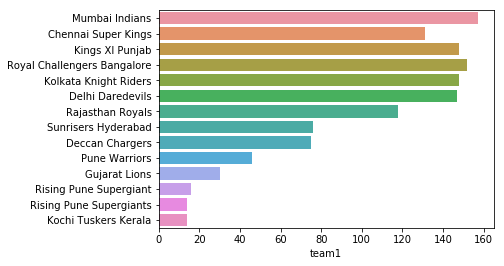

In [39]:
data = match_DF.team1.value_counts()
data += match_DF.team2.value_counts()
sns.barplot(y = data.index, x =  data, orient='h')

In [36]:
sorted(match_DF.team1.unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [37]:
sorted(match_DF.team2.unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']